In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df=pd.read_csv('seasonal.csv')
df.drop('xyz_vaccine',axis=1,inplace=True)
df

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,2.0,55 - 64 Years,White,Female,oxchjgsf,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,2.0,4.0,35 - 44 Years,White,Male,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,18 - 34 Years,White,Male,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4.0,1.0,65+ Years,White,Female,lrircsnp,"MSA, Principle City",0.0,0.0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,4.0,45 - 54 Years,White,Female,qufhixun,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,2.0,65+ Years,White,Female,qufhixun,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,18 - 34 Years,White,Male,lzgpxyit,"MSA, Principle City",1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,4.0,2.0,55 - 64 Years,White,Female,lzgpxyit,"MSA, Not Principle City",0.0,0.0,1
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,1.0,2.0,18 - 34 Years,Hispanic,Female,lrircsnp,Non-MSA,1.0,0.0,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26615 non-null  float64
 1   xyz_knowledge                26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_outside_home      26625 non-null  float64
 7   behavioral_touch_face        26579 non-null  float64
 8   chronic_med_condition        25736 non-null  float64
 9   child_under_6_months         25887 non-null  float64
 10  health_worker                25903 non-null  float64
 11  opinion_seas_vacc_effective  26245 non-null  float64
 12  opinion_seas_risk            26193 non-null  float64
 13  opinion_seas_sic

In [81]:
df.isnull().sum()

xyz_concern                     92
xyz_knowledge                  116
behavioral_antiviral_meds       71
behavioral_avoidance           208
behavioral_face_mask            19
behavioral_wash_hands           42
behavioral_outside_home         82
behavioral_touch_face          128
chronic_med_condition          971
child_under_6_months           820
health_worker                  804
opinion_seas_vacc_effective    462
opinion_seas_risk              514
opinion_seas_sick_from_vacc    537
age_group                        0
race                             0
sex                              0
hhs_geo_region                   0
census_msa                       0
household_adults               249
household_children             249
seasonal_vaccine                 0
dtype: int64

## checking correlation with the output variable

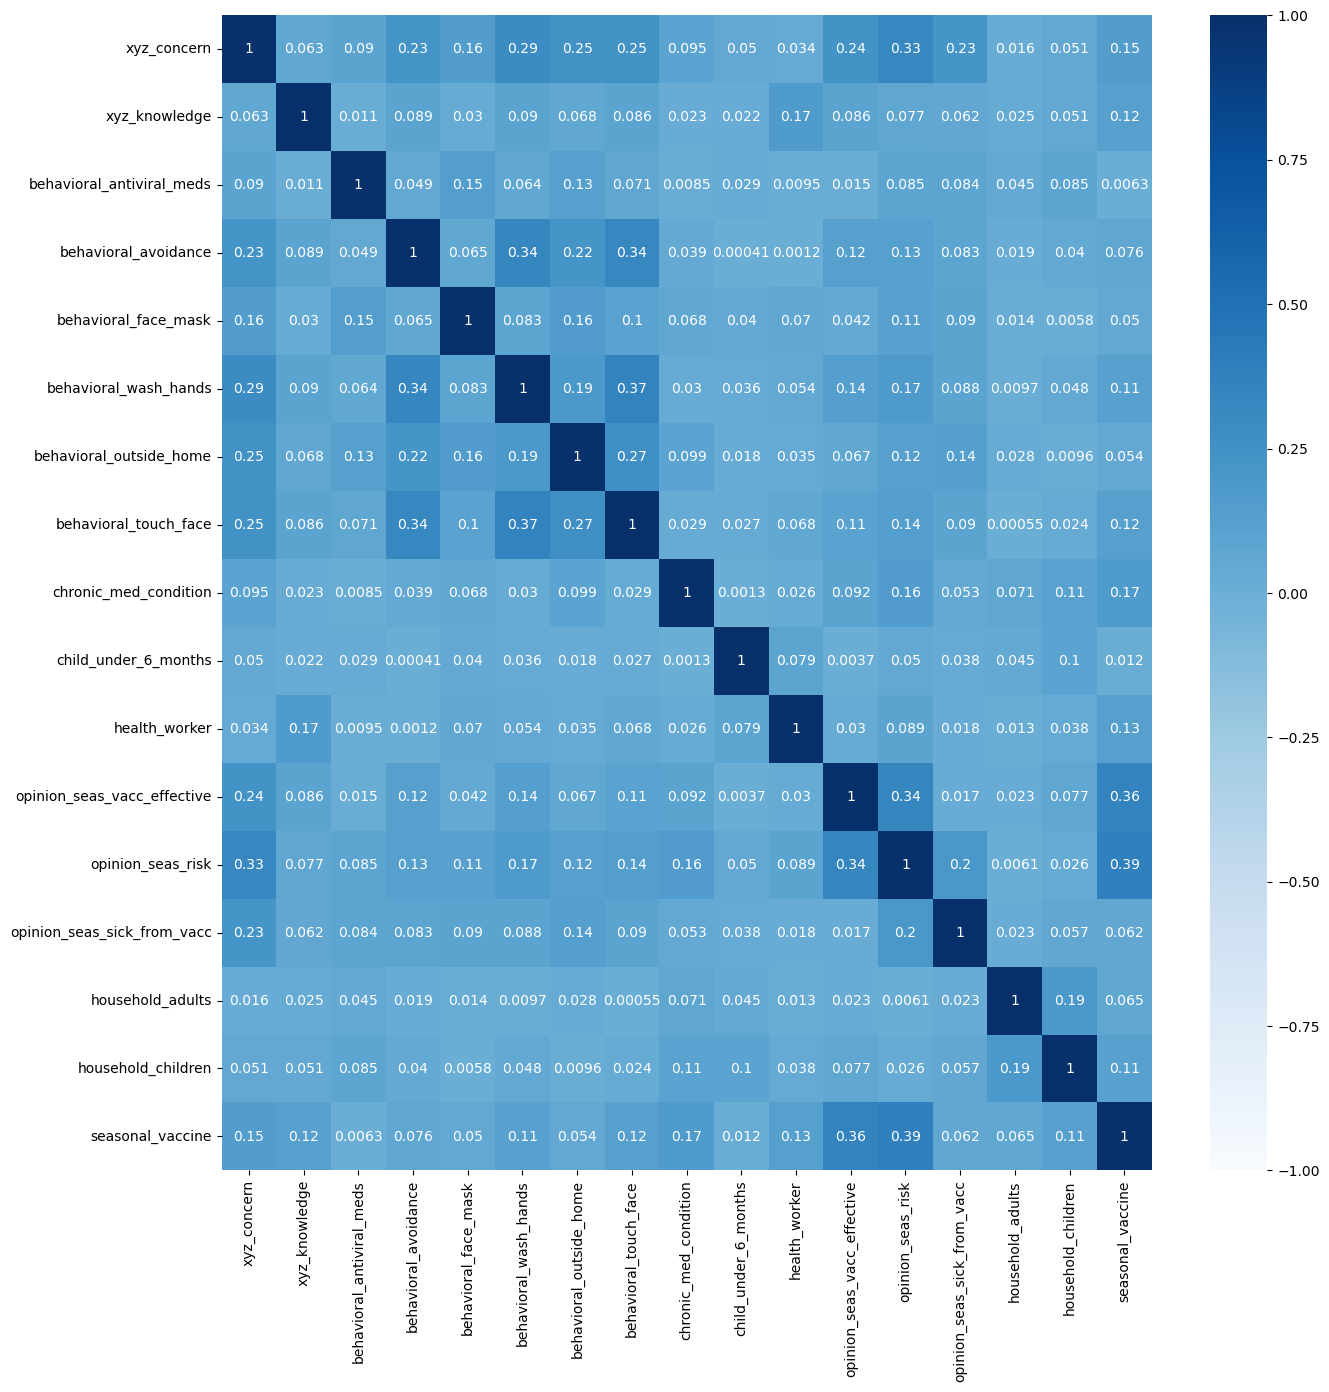

In [82]:
fig,ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(df.corr(numeric_only=True).abs(),annot=True,center=0,cmap='Blues',vmin=-1,vmax=1)

In [83]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,df[i].isnull().sum())

xyz_concern 92
xyz_knowledge 116
behavioral_antiviral_meds 71
behavioral_avoidance 208
behavioral_face_mask 19
behavioral_wash_hands 42
behavioral_outside_home 82
behavioral_touch_face 128
chronic_med_condition 971
child_under_6_months 820
health_worker 804
opinion_seas_vacc_effective 462
opinion_seas_risk 514
opinion_seas_sick_from_vacc 537
household_adults 249
household_children 249


In [84]:
df.dropna(inplace=True)

In [85]:
df.shape

(24938, 22)

array([[<Axes: title={'center': 'xyz_concern'}>,
        <Axes: title={'center': 'xyz_knowledge'}>,
        <Axes: title={'center': 'behavioral_antiviral_meds'}>,
        <Axes: title={'center': 'behavioral_avoidance'}>],
       [<Axes: title={'center': 'behavioral_face_mask'}>,
        <Axes: title={'center': 'behavioral_wash_hands'}>,
        <Axes: title={'center': 'behavioral_outside_home'}>,
        <Axes: title={'center': 'behavioral_touch_face'}>],
       [<Axes: title={'center': 'chronic_med_condition'}>,
        <Axes: title={'center': 'child_under_6_months'}>,
        <Axes: title={'center': 'health_worker'}>,
        <Axes: title={'center': 'opinion_seas_vacc_effective'}>],
       [<Axes: title={'center': 'opinion_seas_risk'}>,
        <Axes: title={'center': 'opinion_seas_sick_from_vacc'}>,
        <Axes: title={'center': 'household_adults'}>,
        <Axes: title={'center': 'household_children'}>],
       [<Axes: title={'center': 'seasonal_vaccine'}>, <Axes: >, <Axes: >,
 

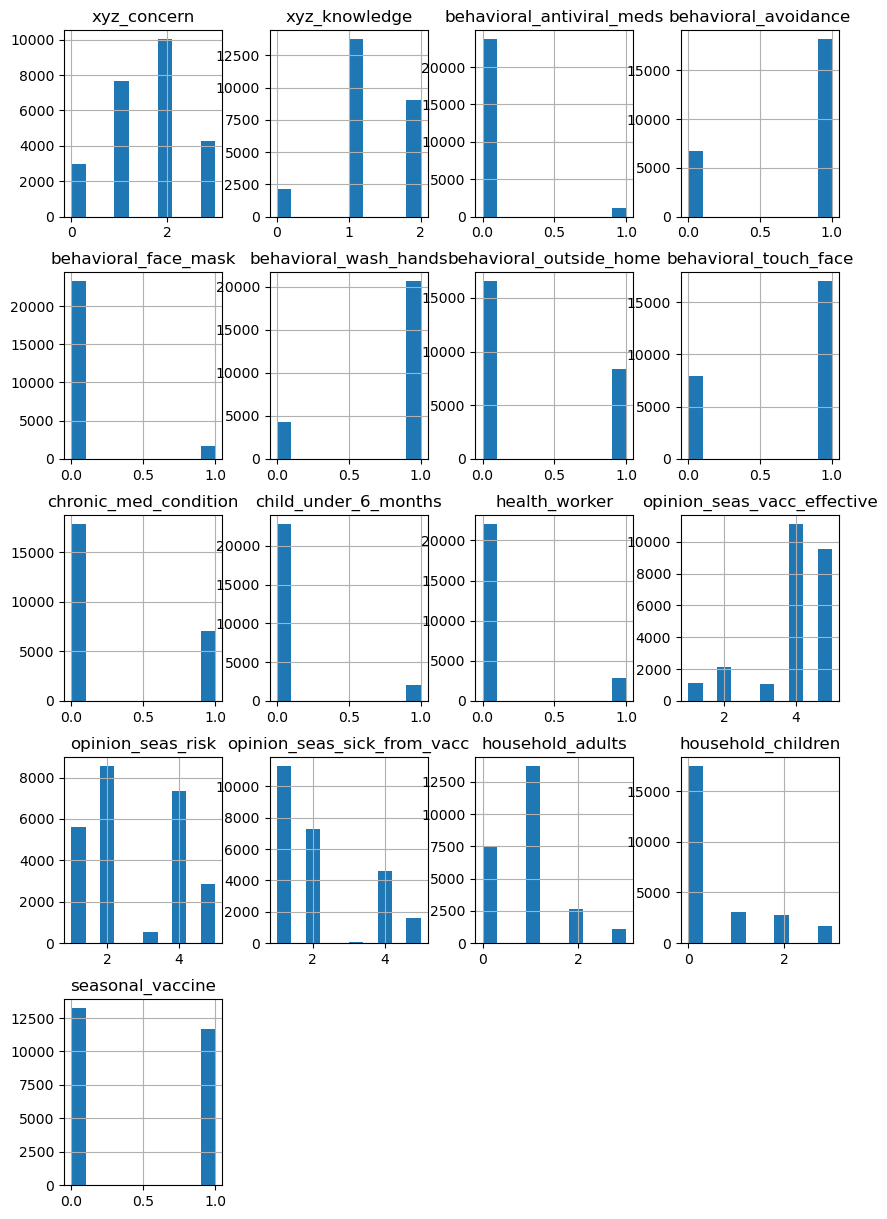

In [86]:
df.hist(figsize=(10,15))

In [87]:
df['xyz_concern'].dtype

dtype('float64')

In [88]:
for i in df.columns:
    if df[i].dtype=='float64':
        df[i]=df[i].astype(int)

In [108]:
for i in df.columns:
    if df[i].dtype!='int32':
        print(df[i].value_counts())
        print('---------------------------------------------------------------------------------------------------------')

age_group
65+ Years        6257
55 - 64 Years    5247
45 - 54 Years    4946
18 - 34 Years    4885
35 - 44 Years    3603
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------------
race
White                19860
Black                 1949
Hispanic              1663
Other or Multiple     1466
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------------
sex
Female    14871
Male      10067
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------------
seasonal_vaccine
0    13261
1    11677
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------------


<Axes: xlabel='seasonal_vaccine', ylabel='count'>

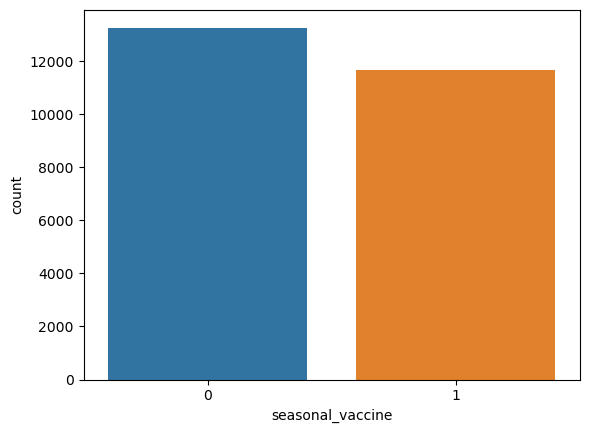

In [90]:
sns.countplot(x=df['seasonal_vaccine'])

In [109]:
# 65+ Years      5  6257
# 55 - 64 Years  4  5247
# 45 - 54 Years  3  4946
# 18 - 34 Years  1  4885
# 35 - 44 Years  2  3603
def age_lab(i):
    if i=='65+ Years':
        return 5
    elif i=='55 - 64 Years':
        return 4
    elif i=='45 - 54 Years':
        return 3
    elif i=='18 - 34 Years':
        return 1
    else:
        return 2
def sex_lab(i):
    if i=='Female':
        return 1
    else:
        return 0
# White                19860
# Black                 1949
# Hispanic              1663
# Other or Multiple     1466
def race_lab(i):
    if i=='White':
        return 3
    elif i=='Black':
        return 2
    elif i=='Hispanic':
        return 1
    else:
        return 0


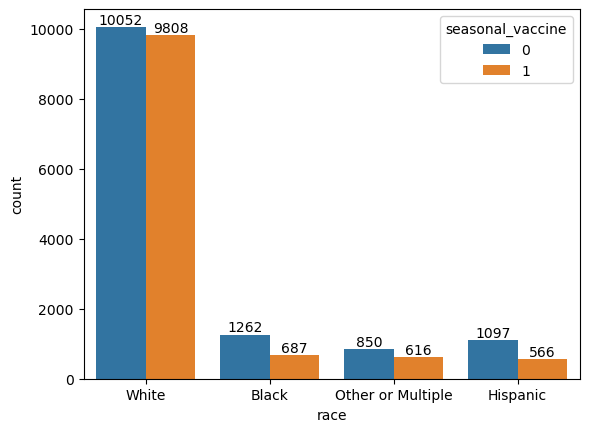

In [91]:
ax=sns.countplot(x=df['race'],hue=df['seasonal_vaccine'])
for i in ax.containers:
    ax.bar_label(i)

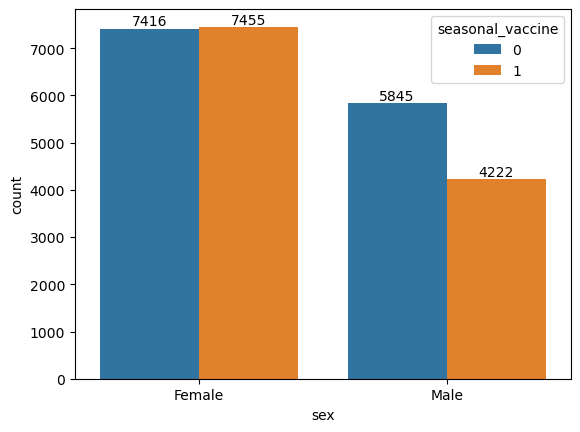

In [92]:
ax=sns.countplot(x=df['sex'],hue=df['seasonal_vaccine'])
for i in ax.containers:
    ax.bar_label(i)

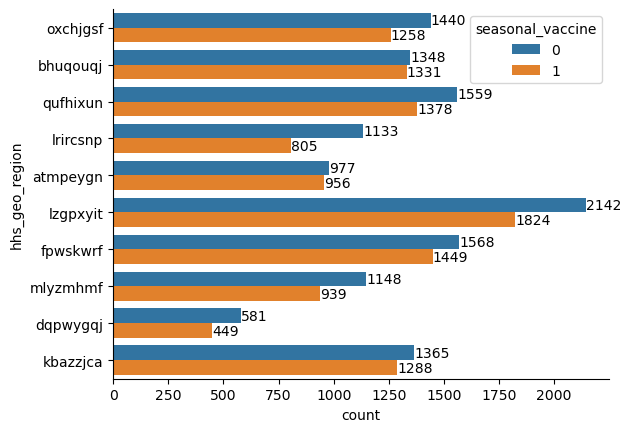

In [95]:
ax=sns.countplot(y=df['hhs_geo_region'],hue=df['seasonal_vaccine'])
for i in ax.containers:
    ax.bar_label(i)
sns.despine()

In [98]:
from scipy.stats import chi2_contingency
contingency_table1 = pd.crosstab(df['hhs_geo_region'], df['seasonal_vaccine'])
chi2, p, dof, expected = chi2_contingency(contingency_table1)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 49.1400806500369
P-value: 1.5624078902582202e-07
Degrees of freedom: 9
Expected frequencies table:
[[1027.88968642  905.11031358]
 [1424.58172267 1254.41827733]
 [ 547.71152458  482.28847542]
 [1604.31618414 1412.68381586]
 [1410.75599487 1242.24400513]
 [1030.54848023  907.45151977]
 [2108.95524902 1857.04475098]
 [1109.78053573  977.21946427]
 [1434.68513915 1263.31486085]
 [1561.7754832  1375.2245168 ]]


In [99]:
contingency_table2 = pd.crosstab(df['race'], df['seasonal_vaccine'])
chi2, p, dof, expected = chi2_contingency(contingency_table2)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 280.0543991202939
P-value: 2.06093219863458e-60
Degrees of freedom: 3
Expected frequencies table:
[[ 1036.39782661   912.60217339]
 [  884.31482076   778.68517924]
 [  779.55834469   686.44165531]
 [10560.72900794  9299.27099206]]


In [100]:
contingency_table3 = pd.crosstab(df['sex'], df['seasonal_vaccine'])
chi2, p, dof, expected = chi2_contingency(contingency_table3)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 161.47424768392247
P-value: 5.389542740142972e-37
Degrees of freedom: 1
Expected frequencies table:
[[7907.78454567 6963.21545433]
 [5353.21545433 4713.78454567]]


In [101]:
contingency_table4 = pd.crosstab(df['age_group'], df['seasonal_vaccine'])
chi2, p, dof, expected = chi2_contingency(contingency_table4)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 2038.3670990158757
P-value: 0.0
Degrees of freedom: 4
Expected frequencies table:
[[2597.64155105 2287.35844895]
 [1915.92681851 1687.07318149]
 [2630.07883551 2315.92116449]
 [2790.13822279 2456.86177721]
 [3327.21457214 2929.78542786]]


In [102]:
contingency_table5 = pd.crosstab(df['census_msa'], df['seasonal_vaccine'])
chi2, p, dof, expected = chi2_contingency(contingency_table5)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 13.671754540229344
P-value: 0.0010745242536374037
Degrees of freedom: 2
Expected frequencies table:
[[5799.36105542 5106.63894458]
 [3865.88619777 3404.11380223]
 [3595.75274681 3166.24725319]]


In [105]:
df.drop(['census_msa','hhs_geo_region'],inplace=True,axis=1)

In [110]:
df['age_group']=df['age_group'].apply(age_lab)
df['race']=df['race'].apply(race_lab)
df['sex']=df['sex'].apply(sex_lab)

In [112]:
df.to_csv('seasonal_final.csv',index=False)